# Transformada de Fourier

<hr/>
Aluno: João Mário C. I. Lago
<br/>
Curso: Engenharia Eletronica 2023.1
<br/>
Sinais e Sistemas
<hr/>

# Sobre o código

O código completo pode ser encontrado no link:
[https://github.com/JoaoMario109/sinais-e-sistemas/tree/master](https://github.com/JoaoMario109/sinais-e-sistemas/tree/master)
Recomenda-se que se clone / baixe o repositório acima na sua máquina para execução deste, bem como que se instale previamente python e as bibliotecas requeridas numpy, control, matplotlib, scipy. Caso esses passos não sejam atendidos, podem ocorrer erros durante a execução bem como um comportamento não esperado do código.

# Introdução



# Objetivos

Através da utilização da transformada de Fourier, o objetivo é examinar como os sinais são representados no domínio da frequência. Além disso, pretende-se analisar como as características do sinal afetam tanto o domínio do tempo quanto o domínio da frequência. Também é importante avaliar a energia presente no sinal em questão.

- Verificar o comportamento da representação de sinais a partir da transformada de Fourier;
- Certificar a influência das características do sinal no domínio do tempo e frequência;
- Avaliar a energia do sinal.

# No código, foram utilizadas as seguintes bibliotecas:

In [16]:
# Packages install
%pip install -q numpy control matplotlib scipy sympy numba

Note: you may need to restart the kernel to use updated packages.


In [17]:
# Análise numérica
import numpy as np
import scipy as sci
# Análise analitica
import sympy as sym
# Plots
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
# Tipagem
from typing import List, Tuple
# Desabilitar warnings (somente para exportação)
import warnings
warnings.filterwarnings('ignore')

# Considerando o sinal x(t) definido como:
$$
x(t) = 
  \begin{cases}
    1 - |t|\text{;} & \quad \frac{-1}{2} \leqslant t \leqslant \frac{1}{2} \\
    \text{0; } & \quad \text{ otherwise} \\
  \end{cases}
$$

## Esboce o sinal x(t) no intervalo $-2 \leqslant t \leqslant 2$

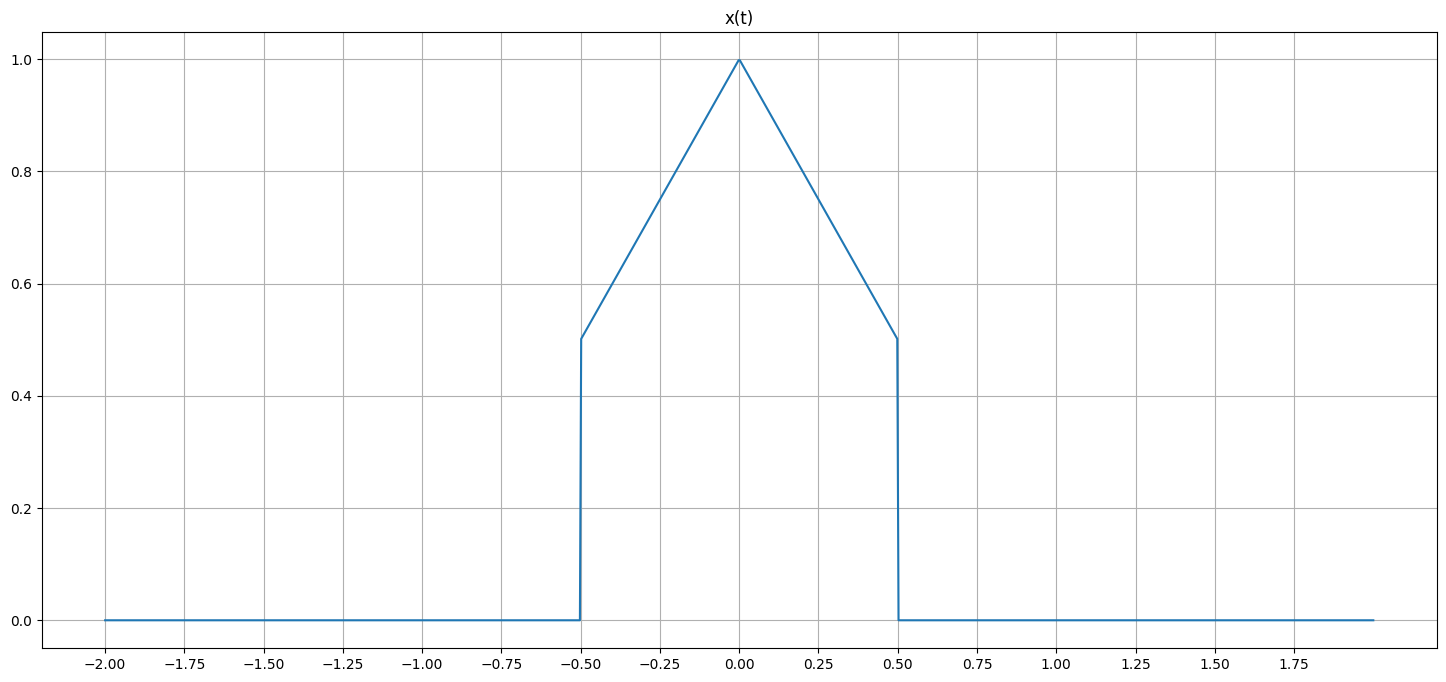

In [18]:
# Create a pulse that is 1 between t0 and tf else is 0
def pulse(t, t0, tf):
    return np.heaviside(t - t0, 1) - np.heaviside(t - tf, 1)

def x(t):
    return ((1 - np.abs(t)) * pulse(t, -0.5, 0.5))


t = np.linspace(-2, 2, 1000)

fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(t, x(t))

# Configurando o grafico

ax.set_title(f'x(t)')
ax.set_xticks(np.arange(t.min(), t.max(), 0.5/2))
ax.grid(visible=True)


## Use a diferenciação temporal e outras propriedades da transformada de Fourier para determinar X(ω). 
A única integração que você deve usar é determinar o componente DC X(0).


### Usando a propiedade linear da transformada


$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então o sinal pode ser desconstruido em:

$$pulso(-0.5, 0.5) + (0.5 -|t|)$$

$$x1(t) = (0.5 -|t|)$$

$$x2(t) = pulso(-0.5, 0.5)$$

É válido ressaltar que a função "pulso" utilizada no código é equivalente à função "rect" (retangular), no entanto, foi escolhido o nome "pulso" para evitar confusão com o delta de Dirac.

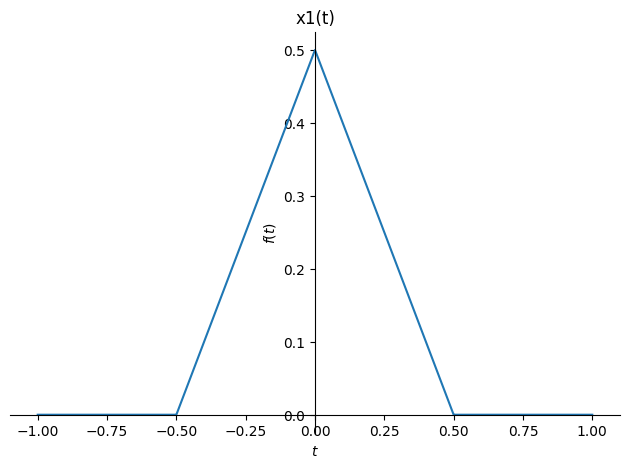

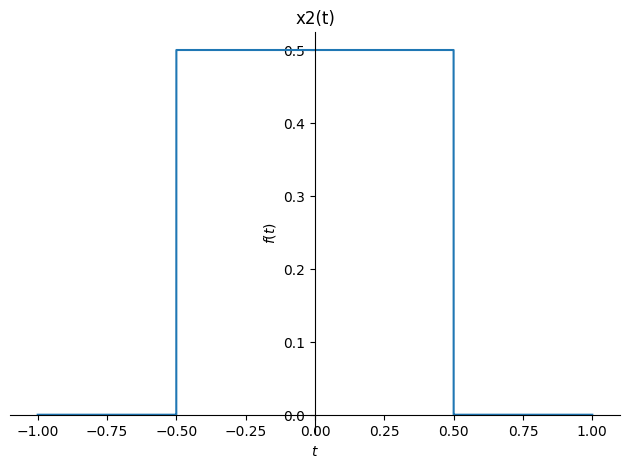

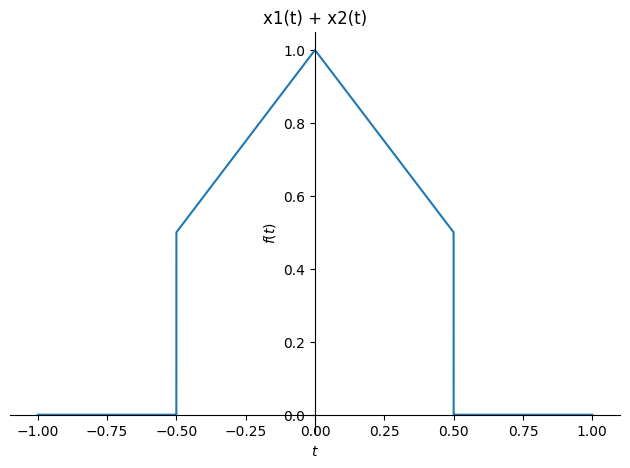

In [19]:
def abs_sym(x):
    return sym.sqrt(sym.Pow(x, 2))

t = sym.Symbol('t')
# Definindo x1(t)
x1_t = (0.5 - abs_sym(t)) * \
(sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))

x2_t = 0.5 * (sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))

sym.plot(x1_t, (t, -1, 1), title="x1(t)")
sym.plot(x2_t, (t, -1, 1), title="x2(t)")
sym.plot(x1_t + x2_t, (t, -1, 1), title="x1(t) + x2(t)")



### Calculando X1(w)

#### Usando a diferenciação temporal

Usando a propiedade da diferenciação temporal:
$$-jwX(w) = \frac{dx}{dt}$$
e
$$-w^2X(w) = \frac{d^2x}{d^2t}$$

então:

Para calcular a transformada de Fourier desse pulso, é necessário realizar várias diferenciações. Primeiramente, obtemos a primeira derivada, dx/dt, que é uma função constante. No entanto, a primeira derivada possui descontinuidades em t = 1/2 e t = -1/2, onde ocorrem saltos positivos de 1 e saltos negativos de -1, respectivamente. Além disso, há uma descontinuidade adicional em t = 0, onde ocorre um salto negativo de -2. É importante lembrar que a derivada de um sinal em um ponto de descontinuidade resulta em um impulso nesse ponto, com uma magnitude igual ao valor absoluto do salto. Portanto, a segunda derivada, d2x/dt2, será uma sequência de impulsos.

Na figura a seguir, é apresentado o esboço das derivadas.

Usando a propriedade da diferenciação temporal, podemos obter as derivadas sucessivas do sinal.

$$ -w²X1(w) = \delta(t - \frac{1}{2}) -2\delta(t) + \delta(t + \frac{1}{2}) $$

logo

$$ X1(w) = \frac{\delta(t - \frac{1}{2}) -2\delta(t) + \delta(t + \frac{1}{2})}{-w^2}$$

fazendo a transformada dos deltas

Obs: $\delta(t - t_0) = e^{-jwt_0}$

$$ X1(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2}$$

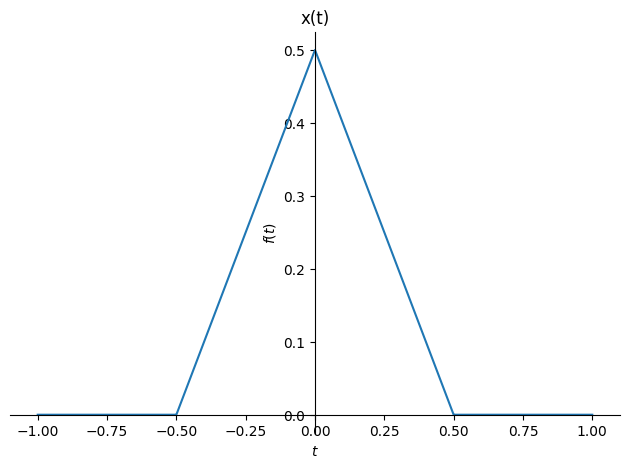

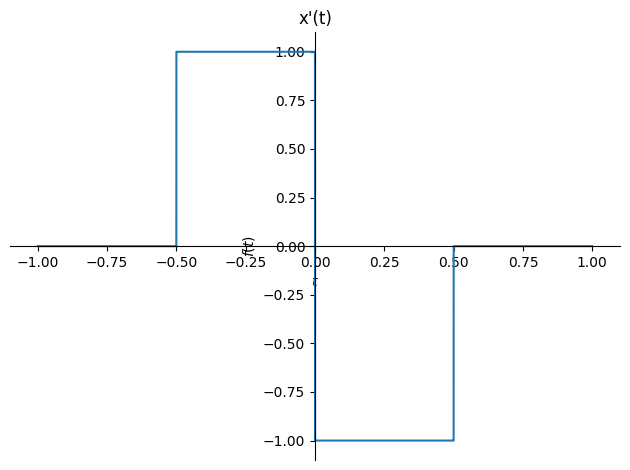

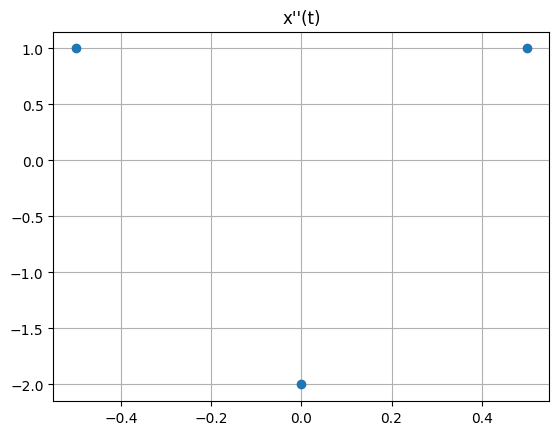

In [20]:
def abs_sym(x):
    return sym.sqrt(x**2)

t = sym.Symbol('t')

# Definindo x1(t)
x1_t = (0.5 - abs_sym(t)) * \
(sym.Heaviside(t + sym.Rational(1, 2)) - sym.Heaviside(t + sym.Rational(-1, 2)))
# Derivando x1(t)
dx1_t = sym.diff(x1_t)
# Segunda derivada de x1(t)
ddx1_t = sym.diff(dx1_t)


sym.plot(x1_t, (t, -1, 1), title="x(t)")

sym.plot(dx1_t, (t, -1, 1), title="x'(t)")

plt.plot([0.5, -0.5, 0], [1, 1, -2], "o", )
plt.title('x\'\'(t)')
plt.grid()

#### Verificando a transformada de X1(w)

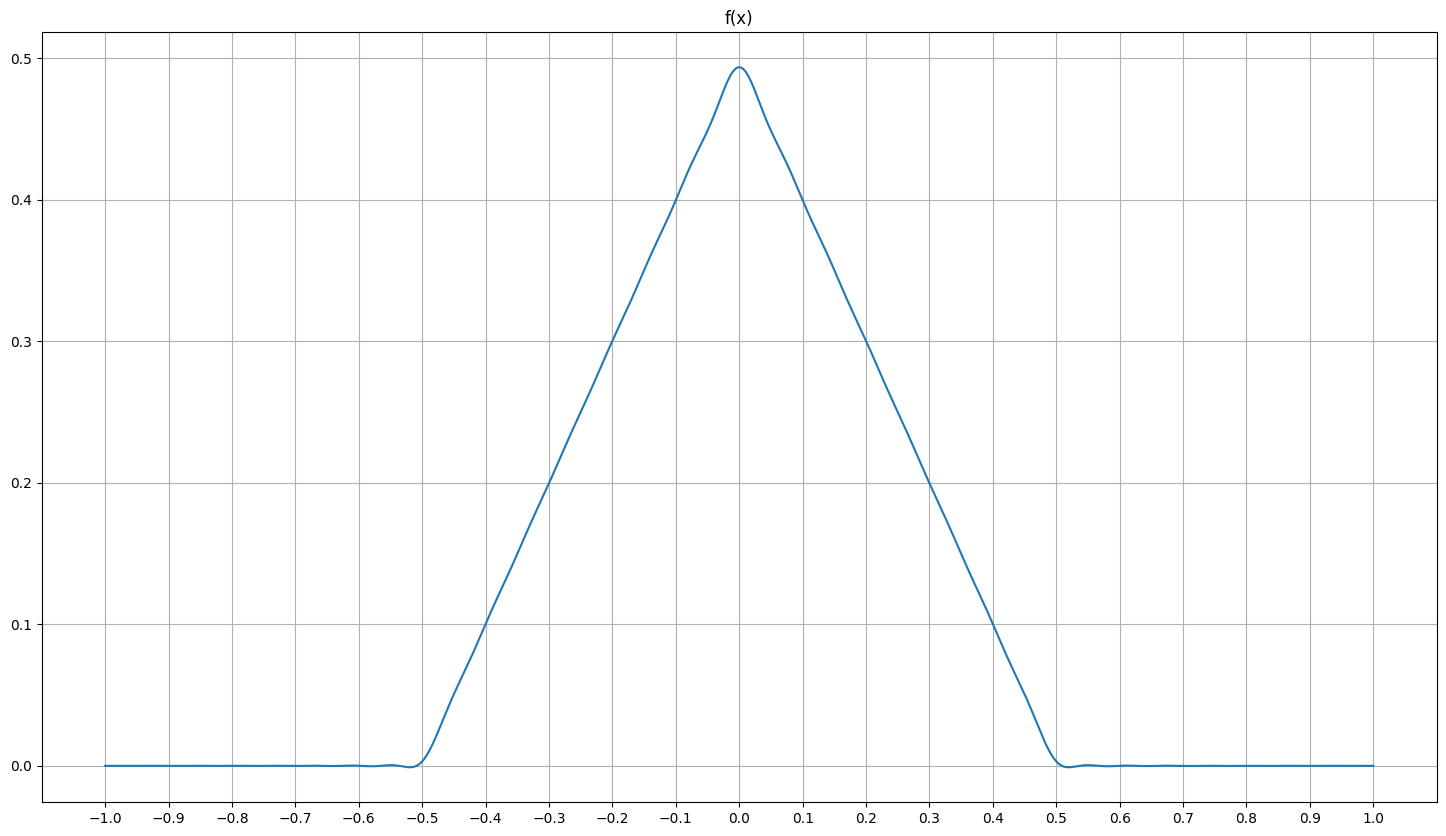

In [21]:
def x_w(w):
    return ((np.exp(1j * (w / 2))) + -2 + (np.exp(-1j * (w / 2)))) / (-(w)**2)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

# limites do grafico
x_min = -1
x_max = 1
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-100, 100, 1000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t))

# Show the plot
plt.show()

### Calculando X2(w)

#### Usando a diferenciação temporal

Usando a propiedade da diferenciação temporal:
$$-jwX(w) = \frac{dx}{dt}$$

então:

Para calcular a transformada de Fourier de uma função retangular (rect), realizamos a diferenciação uma vez. A função retangular é constante e possui duas descontinuidades em -1/2 e 1/2, cada uma com uma altura de 1/2. Conforme a propriedade que afirma que a derivada de um sinal em um ponto de descontinuidade resulta em um impulso nesse ponto, com uma magnitude igual ao valor absoluto do salto, obtemos uma sequência de impulsos como primeira derivada.

Usando a propriedade da diferenciação temporal:

$$ -jwX2(w) = \frac{1}{2}\delta(t - \frac{1}{2}) - \frac{1}{2}\delta(t + \frac{1}{2}) $$

fazendo a transformada dos deltas

Obs: $\delta(t - t_0) = e^{-jwt_0}$

$$ X2(w) = \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$


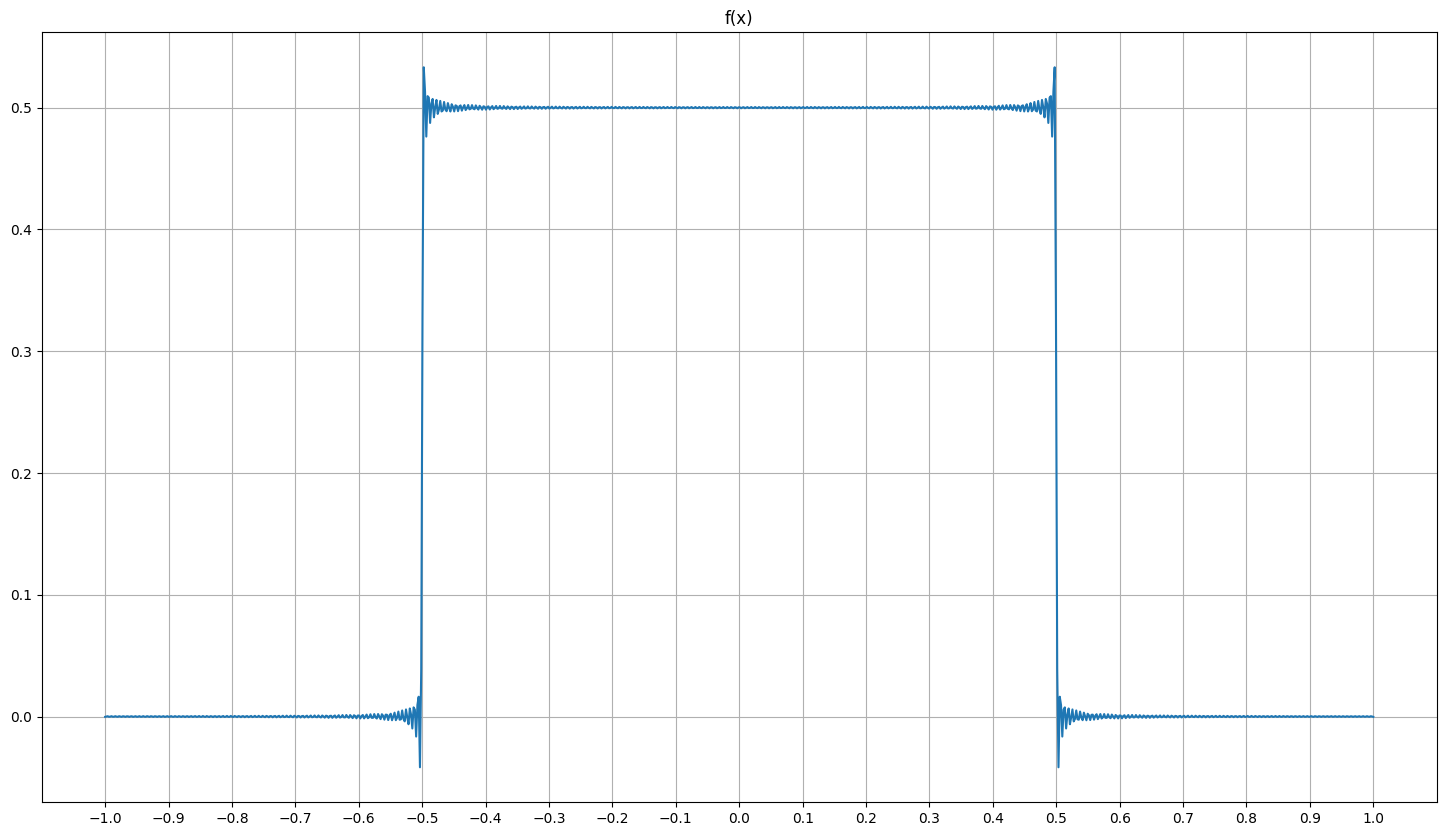

In [22]:
def x_w(w):
    return ((np.exp(1j * (w / 2)) / 2) - (np.exp(-1j * (w / 2))) /2) / (1j * w)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

# limites do grafico
x_min = -1
x_max = 1
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-1000, 1000, 1000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t))

# Show the plot
plt.show()

### Calculando X(w)

Usando a propiedade linear 
$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então:

$$X(w) = X1(w) + X2(w)$$

$$ X1(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2}$$

$$ X2(w) = \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$

$$ X(w) = \frac{e^{\frac{jw}{2}} -2 + e^{\frac{-jw}{2}}}{-w^2} + \frac{\frac{e^{\frac{jw}{2}}}{2} - \frac{e^{\frac{-jw}{2}}}{2}}{-jw}$$

In [23]:
w = sym.Symbol('w')

X1_w = (sym.exp(sym.I * w / 2) - 2 + sym.exp(-sym.I * w / 2)) / (-(w**2))
X2_w = ((sym.exp(sym.I * w / 2) / 2) - (sym.exp(-sym.I * w / 2) / 2)) / -(sym.I * w)

X_w = X1_w + X2_w

display(sym.simplify(X_w))

(-I*w*(1 - exp(I*w)) + 2*(2 - exp(I*w/2))*exp(I*w/2) - 2)*exp(-I*w/2)/(2*w**2)

## Usando um programa computacional, verifique a exatidão de X(ω) sintetizando a partir da reprodução de 3 períodos do sinal original no domínio do tempo x(t)

A transformada de Laplace é baseada na suposição de que a função x(t) tem energia limitada, ou seja, a integral de |x(t)|^2 em todo o domínio de t é finita.

Quando um sinal não atende a essa restrição, a transformada de Laplace pode introduzir distorções na reconstrução do sinal original. Isso ocorre principalmente porque a transformada de Laplace pressupõe que o sinal tenha energia limitada e, portanto, é válida apenas para um conjunto restrito de funções. Partes do sinal que possuem componentes de frequência infinita, como picos ou mudanças abruptas, acabam introduzindo distorção quando a transformada de Laplace é aplicada.

Essa distorção ocorre principalmente em situações em que o sinal original possui características não lineares, picos abruptos, descontinuidades, pulsos estreitos ou componentes de frequência ilimitada. Nessas situações, a transformada de Laplace pode fornecer uma representação inadequada do sinal, resultando em distorção na reconstrução.

Como pode ser visto no sinal reconstruído abaixo, é possivel verificar que este possui uma distorção que ocorre próximo as regiões de descontinuidade do sinal, como esperado devido ao comportamento do sinal x(t).

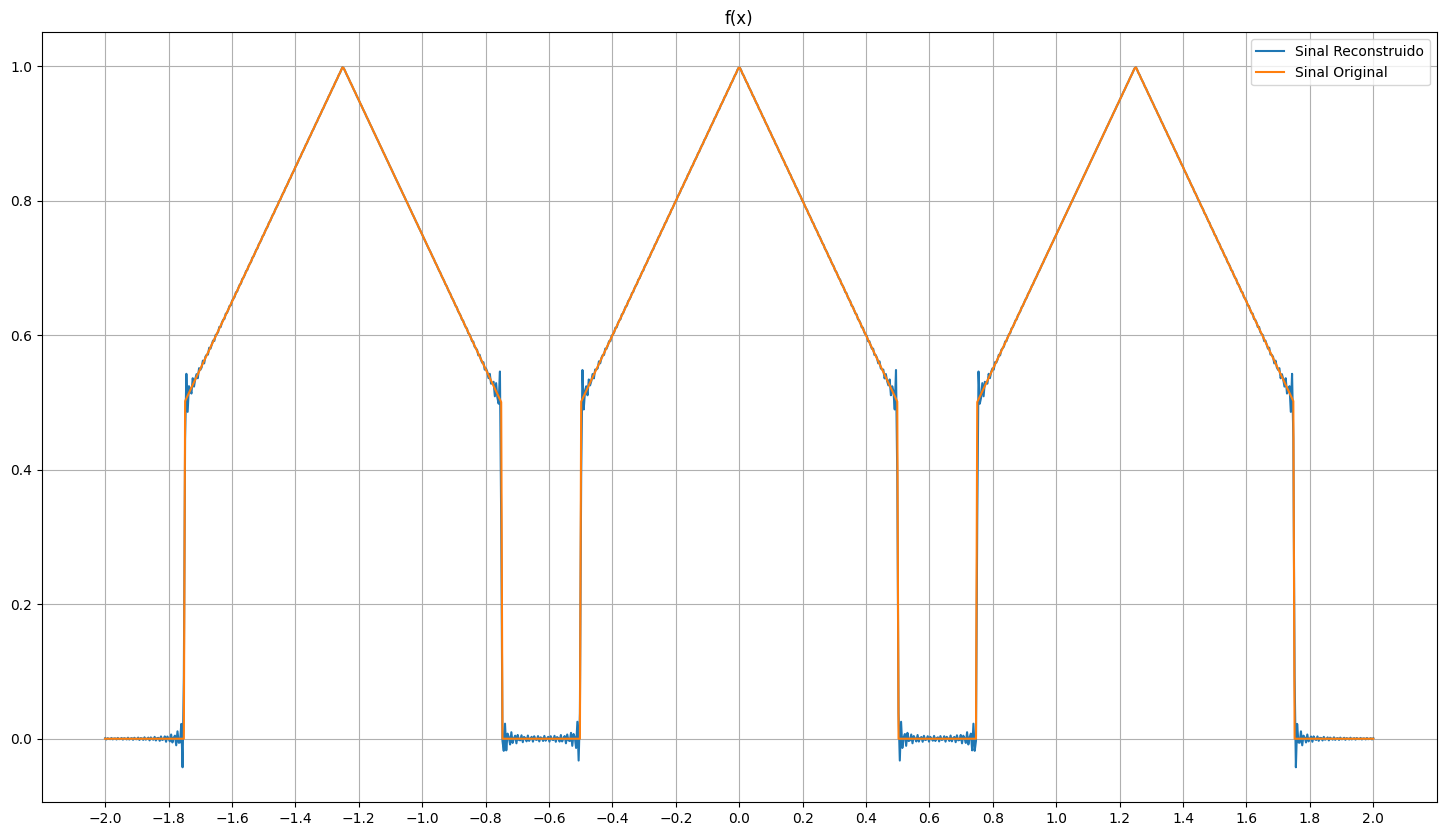

In [24]:
def x1_w(w):
    return ((np.exp(1j * (w / 2))) + -2 + (np.exp(-1j * (w / 2)))) / (-(w)**2)

def x2_w(w):
    return ((np.exp(1j * (w / 2)) / 2) - (np.exp(-1j * (w / 2))) /2) / (1j * w)

def x_w(w):
    return x1_w(w) + x2_w(w)

def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

def x_t(t):
    return ((1 - np.abs(t)) * pulse(t, -0.5, 0.5))

# limites do grafico
x_min = -2
x_max = 2
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-600, 600, 10000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new(w, t +1.25) + f_t_new(w, t) + f_t_new(w, t -1.25), label="Sinal Reconstruido")
ax.plot(t,x_t(t + 1.25) + x_t(t) + x_t(t -1.25), label="Sinal Original")

ax.legend()
# Show the plot
plt.show()

# Considere o sinal:
$$x(t) = |t|rect (\frac{t − 1}{3})$$

## Esboce o sinal x(t) no intervalo −5 ≤ t ≤ 5

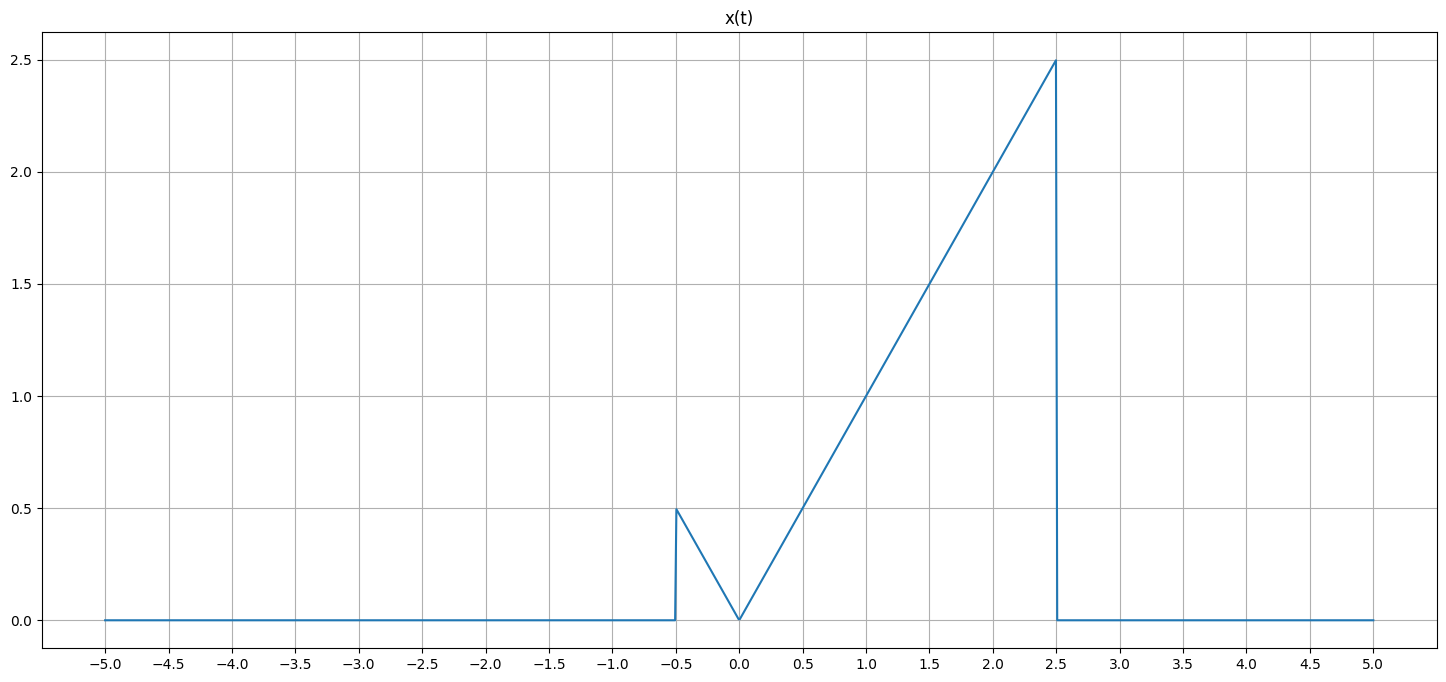

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Create a pulse that is 1 between t0 and tf else is 0
def pulse(t, t0, tf):
    return np.heaviside(t - t0, 1) - np.heaviside(t - tf, 1)

def x(t):
    return (np.abs(t) * pulse(t, -0.5, 2.5))

# Definir o intervalo de tempo
t = np.linspace(-5, 5, 1000)

# Plotar o sinal x(t)
fig = plt.figure(figsize = (18, 8))
ax = fig.add_subplot()
ax.grid()
ax.plot(t, x(t))

# Configurando o grafico

ax.set_title(f'x(t)')
ax.set_xticks(np.arange(t.min(), t.max() + 0.001, t.max()/10))
ax.grid(visible=True)

### Usando a propiedade linear da transformada


$$
c1 x1(t) + c2 x2(t) = c1 X1(w) + c2 X2(w)
$$

então o sinal pode ser desconstruido em:

$$
x(t) =
  \begin{cases}
    t & \quad \text{if }  \frac{1}{2} <= x <= 0 \\
    -t & \quad \text{ if }  0 <= x <= \frac{5}{2} \\
  \end{cases}
$$

logo a transformada vai ser 

$$
  X(w) = \int_{\frac{-1}{2}}^{0} -t * e^{-j*w*t} + 
    \int_{0}^{\frac{-5}{2}} t * e^{-j*w*t}
$$

resolvendo a integral

$$
\begin{cases} 
  \frac{\left(- 0.5 i w e^{3.0 i w} + 2.5 i w - 2.0 e^{2.5 i w} + 1.0 e^{3.0 i w} + 1.0\right) e^{- 2.5 i w}}{w^{2}} & 
  \text{for}\: w \neq 0 \\\frac{13}{4} & \text{otherwise} 
\end{cases}
$$



In [26]:
def abs_sym(x):
    return sym.Abs(x)

t = sym.Symbol('t')
# Definindo x(t)
x_t = abs_sym(t)

# Calculando a transformada de fourier
w = sym.Symbol('w')
x_w1 = sym.integrate(-t * sym.exp(-1j * w * t), (t, -sym.Rational(1,2), 0))
x_w2 = sym.integrate(t * sym.exp(-1j * w * t), (t, 0, sym.Rational(5,2)))
x_w = x_w1 +  x_w2

# Simplificando o resultado
x_w = sym.simplify(x_w).rewrite(sym.exp).simplify().trigsimp()
display(x_w)
print(sym.latex(x_w))

x_w = sym.lambdify(w, x_w)

Piecewise(((-0.5*I*w*exp(3.0*I*w) + 2.5*I*w - 2.0*exp(2.5*I*w) + 1.0*exp(3.0*I*w) + 1.0)*exp(-2.5*I*w)/w**2, Ne(w, 0)), (13/4, True))

\begin{cases} \frac{\left(- 0.5 i w e^{3.0 i w} + 2.5 i w - 2.0 e^{2.5 i w} + 1.0 e^{3.0 i w} + 1.0\right) e^{- 2.5 i w}}{w^{2}} & \text{for}\: w \neq 0 \\\frac{13}{4} & \text{otherwise} \end{cases}


## Use um programa computacional para plotar o espectro de magnitude |X(ω)| e o espectro de fase X(ω) em intervalos adequados de ω.

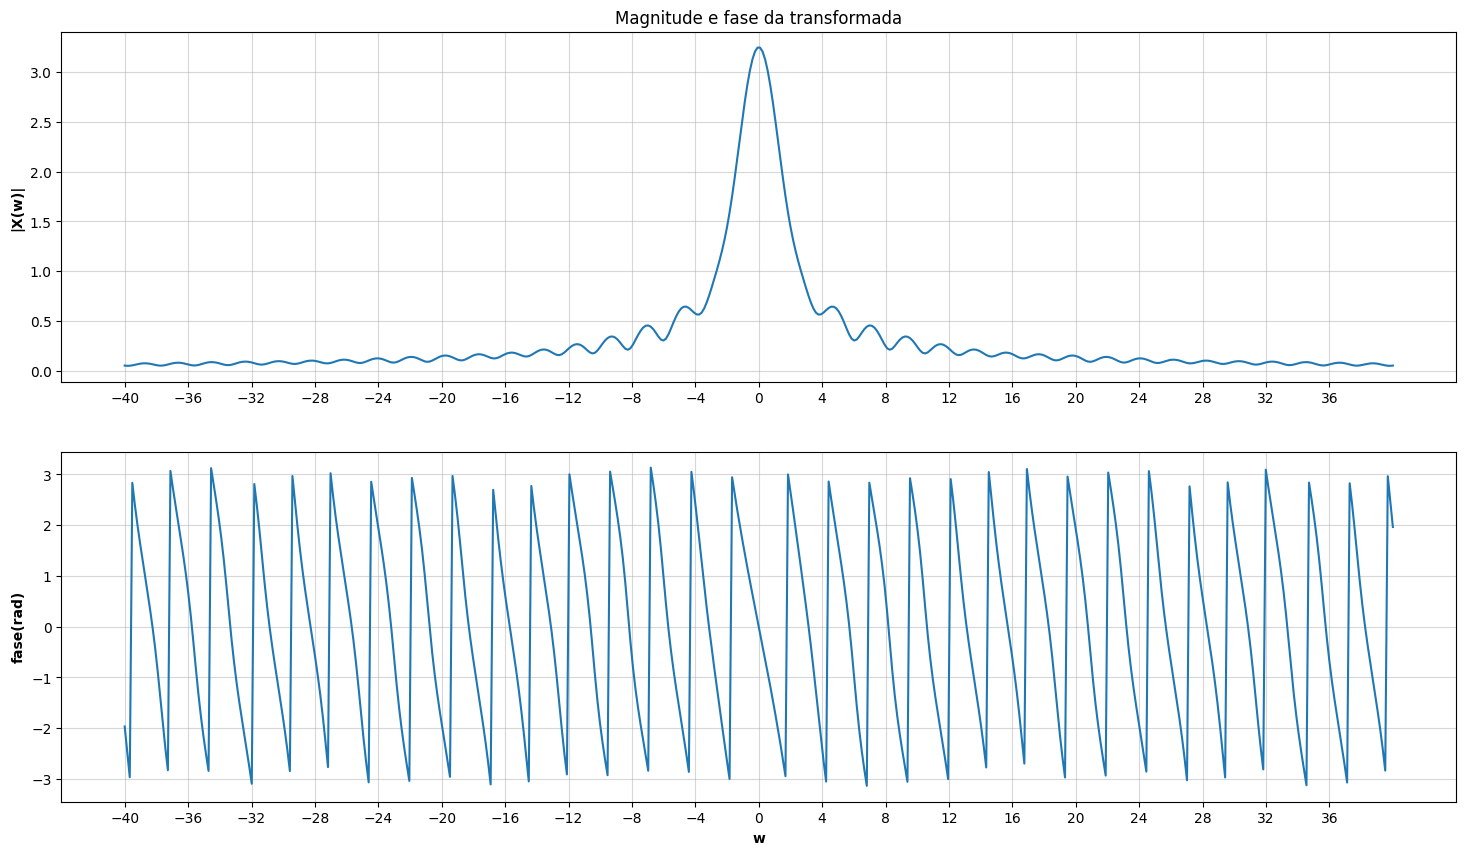

In [27]:
# Numero de pontos
resolution = 500

# Velocidade angula maxima
w_max = 40

# Criando um vetor de harmonicas
w = np.linspace(-w_max, w_max, resolution)

fig = plt.figure(figsize=(18, 10))
ax, ax2 = fig.subplots(2, 1)
ax.set_title("Magnitude e fase da transformada")

# Grafico da magnitude dos coeficientes
ax.plot(w, np.abs(x_w(w)), label = '|X(w)|')
ax.set_ylabel("|X(w)|", weight = "bold")
ax.set_xticks(np.arange(-w_max, w_max, w_max/10))
ax.grid(alpha = 0.5)

# Grafico da fase dos coeficientes
ax2.plot(w, np.angle(x_w(w)), label = '<X(w)')
ax2.set_ylabel("fase(rad)", weight = "bold")
ax2.set_xlabel("w", weight = "bold")
ax2.set_xticks(np.arange(-w_max, w_max, w_max/10))
ax2.grid(alpha = 0.5)

## Usando um programa computacional, verifique a exatidão de X(ω) sintetizando uma replicação de 10 períodos do sinal original no domínio do tempo x(t)

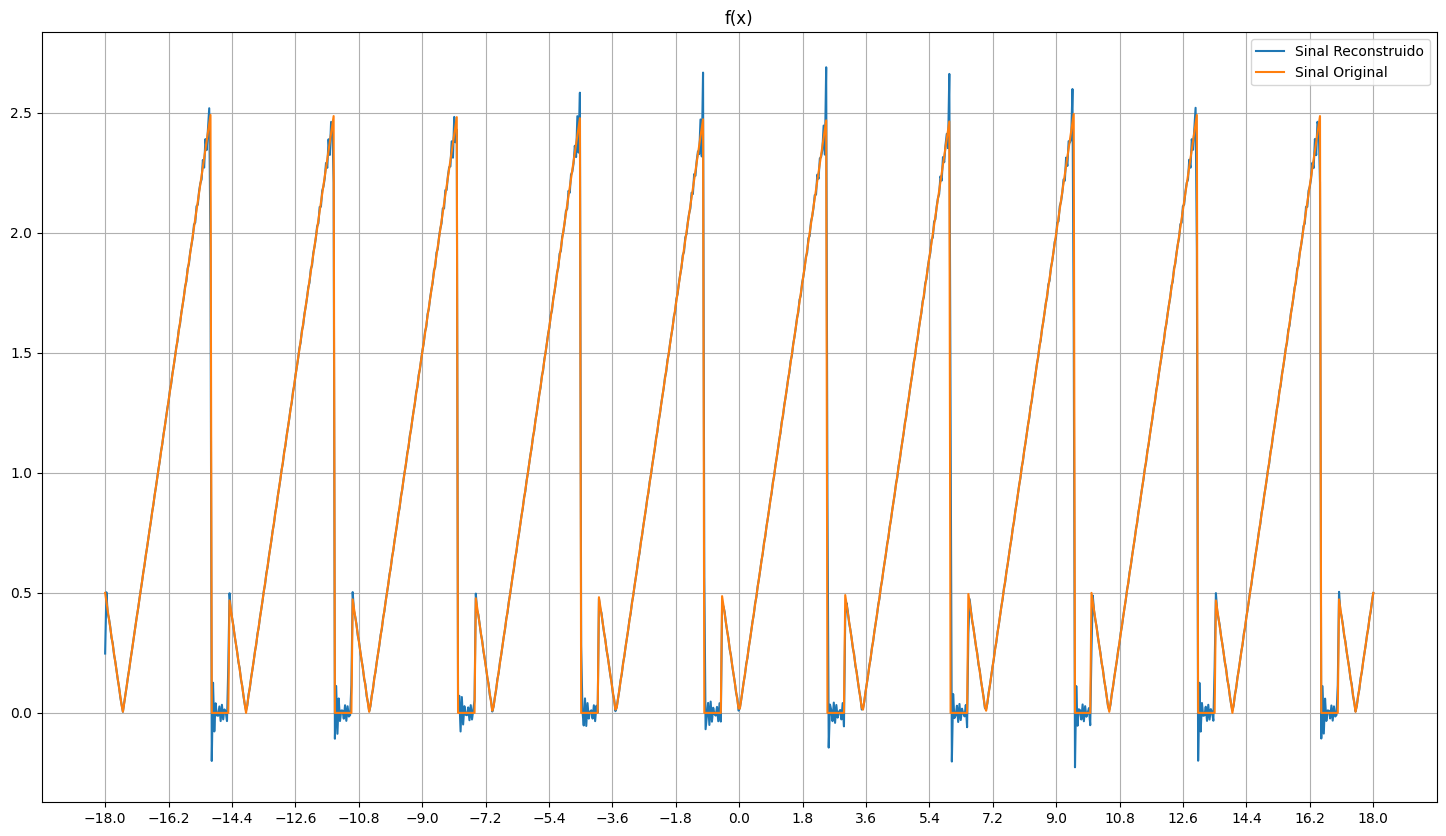

In [28]:
# Faz a transformada inversa de x_w
def f_t_new(w, ts):
    y = np.array([])
    for t in ts:
        y = np.append(y, np.trapz(x_w(w) * np.exp(1j * w * t), w) / (2 * np.pi))  # Normalize within the integration
    return y

def f_t_new_periodic(f_t, w, ts, k, k_t):
    y = np.zeros_like(ts)
    for i in range(0, k):
        y = y + f_t(w, t + (i * k_t))
        if i == 0:
            continue
        y = y + f_t(w, t - (i * k_t))
    return y

def x_t_periodic(x_t, t, k, k_t):
    y = np.zeros_like(t)
    for i in range(0, k):
        y = y + x_t(t + (i * k_t))
        if i == 0:
            continue
        y = y + x_t(t - (i * k_t))
    return y   

def x_t(t):
    return (np.abs(t) * pulse(t, -0.5, 2.5))
 
# limites do grafico
x_min = -18
x_max = 18
# Criando um vetor de t
t = np.linspace(x_min, x_max, 1000)

# Cria a figura e o plot e ativa o grid
fig, ax = plt.subplots(1, 1, figsize = (18, 10))

# Criando um vetor de velocidades angulares
w = np.linspace(-100, 100, 10000)

# Configurando o grafico
ax.set_title(f'f(x)')
ax.set_xticks(np.arange(x_min, x_max + 0.1, x_max / 10))
ax.grid()  

# Cria o grafico da onda estimada
ax.plot(t, f_t_new_periodic(f_t_new, w, t, 6, 3.5), label="Sinal Reconstruido")
ax.plot(t, x_t_periodic(x_t, t, 6, 3.5), label="Sinal Original")

ax.legend()
# Show the plot
plt.show()

## Analise

Através da propriedade da dualidade da transformada, foi possível analisar o sinal no domínio da frequência e reconstruí-lo de volta para o domínio do tempo. No entanto, devido às limitações computacionais do programa utilizado, a integral é aproximada numericamente com uma taxa de amostragem limitada. Isso resulta na representação do sinal sem as componentes de alta frequência, o que é particularmente evidente nas regiões de descontinuidade do sinal. Nessas regiões, o sinal original contém infinitas harmônicas de alta frequência, mas devido à limitação na taxa de amostragem, ocorre uma discrepância entre o sinal reconstruído e o sinal original.

# Considere o sinal 𝑥(𝑡) = 𝑒 −𝑎𝑡 𝑢(𝑡). Modifique o programa MS7P2 (páginas 663-665: Livro Lathi) para calcular as seguintes larguras de banda essenciais

## Port do programa MS7P2 para python

Realizou-se o port do programa, mesmo que não tenha sido requisitado, a fim de complementar o contexto do trabalho e facilitar a compreensão do algoritmo utilizado.

O programa a seguir utiliza um algoritmo de perturbação e observação para determinar o ponto em que o menor erro relativo entre a energia calculada no domínio do tempo se aproxima da energia calculada no domínio da frequência. Isso permite encontrar a banda W em que um determinado percentual da energia do sinal está concentrado.

In [29]:
# JIT utils for speed
from numba import float64, jit

#
# Section 7, Program 2 port Python
#

def MS7P2(signal, tau: float, beta: float, tol: float) -> Tuple[float, float]:
	"""
	Calculates the essential bandwidth W of a signal.

	Inputs:
		- signal = signal to be analyzed
		- tau = pulse width
		- beta = fraction of the signal energy desired in W
		- tol = relative energy error tolerance

	Outputs:
		- W = essential bandwidth [rad/s]
		- E_W = Energy contained in the bandwidth W
	"""
	
	# Desired energy in W
	E = beta * tau

	# Initial relative error as 100% and E_W as 0
	E_W = 0
	relative_error = (E - 0) / E

	# Initial guess and step values
	W = 0
	step = 2.0 * np.pi / tau

	# Perturb W until the relative error is within the tolerance
	while np.abs(relative_error) > tol:
		# If W is too small
		if relative_error > 0:
			# Increase W by step
			W = W + step
		# If W is too large
		elif relative_error < 0:
			# Decrease step and then W
			step = step / 2.0
			W = W - step
		E_W = (sci.integrate.quad(signal, -W, W, args=(tau,))[0]) / (2 * np.pi)
		relative_error = (E - E_W) / E

	return (W, E_W)


# Define SINC function as MS7P1 from book
@jit(float64(float64), nopython = True, cache = True)
def MS7P1(x):
	return (np.sin(x) / x) if x != 0 else 1


# Define signal analyzed in book
@jit(float64(float64, float64), nopython = True, cache = True)
def x_squared(omega, tau):
	return (tau * MS7P1(omega * tau / 2.0)) ** 2

 
# Define input parameters
tau = 1
beta = 0.9
tol = 0.0005


# Compute desired results
(W, E_W) = MS7P2(x_squared, tau, beta, tol)

print("W = ", W)
print("E_W = ", E_W)

W =  5.3014376029327765
E_W =  0.899707680234536


## Resolvendo para os casos da questão

Para resolver a questão, em vez de utilizar a técnica do programa MS7P2, optou-se por utilizar a minimização de uma função de erro usando a biblioteca scipy. Para isso, foi realizada de forma analítica a definição dos valores das integrais, tanto no domínio do tempo quanto no domínio da frequência. Em seguida, foi gerada uma função de erro a ser minimizada. Utilizando os parâmetros fornecidos para cada caso das questões, realizou-se a minimização do erro, encontrando assim a banda W requerida.

In [30]:
#
# Modified Section 7, Program 2 port Python
#

#
# Get target energy for a given band percentage
#
def get_E(beta):
	return (beta * np.pi) / 2.0

#
# Get energy for a given W
#
def get_E_W(W, alpha):
	return np.arctan(W / alpha)

#
# Absolute error minimization function
#
def W_energy(W, alpha, beta):
	# Desired energy in W
	E = get_E(beta)

	# Calculates energy in W
	E_W = get_E_W(W, alpha)

	# Calculates relative error
	relative_error = (E - E_W)

	return np.abs(relative_error)

 
# Define input parameters
tol = 0.00000001

#
# Calculates W and E_W for following combinations
#     - (alpha = 1, beta = 0.95)
#     - (alpha = 2, beta = 0.9)
#     - (alpha = 3, beta = 0.75)
#
for i in [
	{ "alpha": 1, "beta": 0.95 },
	{ "alpha": 2, "beta": 0.9 },
	{ "alpha": 3, "beta": 0.75 },
]:
	# Compute desired results

	res = sci.optimize.minimize_scalar(W_energy, args=(i['alpha'], i['beta']), tol = tol)

	print(res.success)
	print(f"Analyzing W and EW for alpha = {i['alpha']} and beta = {i['beta']}")
	print(f"    - W = {res.x}")
	print(f"    - E_W = {get_E_W(res.x, i['alpha'])}")


True
Analyzing W and EW for alpha = 1 and beta = 0.95
    - W = 12.706204711367974
    - E_W = 1.4922565103024459
True
Analyzing W and EW for alpha = 2 and beta = 0.9
    - W = 12.62750308185892
    - E_W = 1.4137166947578983
True
Analyzing W and EW for alpha = 3 and beta = 0.75
    - W = 7.242640720109697
    - E_W = 1.178097246706617


## Definindo a=1, determine a largura de banda essencial W1 que contém 95% da energia do sinal. Compare este valor com o teórico valor apresentado no Ex. 7.20 do livro.

- W = 12.706204711367974
- E_W = 1.4922565103024459

No exemplo 7.20 do livro, foi obtido o valor de 12.706 rad/s, o que está de acordo com o resultado obtido. É possível que algum erro seja introduzido devido à tolerância do algoritmo, mas, para o cenário analisado, os valores coincidem.

## Definindo a=2, determine a largura de banda essencial W2 que contém 90% da energia do sinal.

- W = 12.62750308185892
- E_W = 1.4137166947578983

## Definindo a=3, determine a largura de banda essencial W3 que contém 75% da energia do sinal.

- W = 7.242640720109697
- E_W = 1.178097246706617